로이터 데이타텟 로드하기






In [107]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [108]:
len(train_data)

8982

In [109]:
len(test_data)

2246

In [110]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [111]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [112]:
train_labels[10]

3

데이터 인코딩하기

In [113]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
# end of def

x_train = vectorize_sequences(train_data) #훈련데이타 벡터 변환
x_test = vectorize_sequences(test_data) #테스트 데이타 벡터 변환

In [114]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
# end of def

one_hot_train_labels = to_one_hot(train_labels) #훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) #테스트 레이블 벡터 변환

모델정의하기

In [115]:
from keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(46, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)              

모델 컴파일

In [116]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

검증 세트 준비하기

In [117]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

모델 훈련하기

In [118]:
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=20, batch_size=256, validation_data=(x_val, y_val))
result = model.evaluate(x=x_test, y=one_hot_test_labels)

Epoch 1/20
32/32 [==============================] - 2s 56ms/step - loss: 13.6470 - accuracy: 0.3068 - val_loss: 9.6005 - val_accuracy: 0.3540
Epoch 2/20
32/32 [==============================] - 2s 51ms/step - loss: 8.2714 - accuracy: 0.3386 - val_loss: 6.6868 - val_accuracy: 0.3540
Epoch 3/20
32/32 [==============================] - 2s 48ms/step - loss: 5.6702 - accuracy: 0.3505 - val_loss: 4.5935 - val_accuracy: 0.3600
Epoch 4/20
32/32 [==============================] - 2s 49ms/step - loss: 4.1795 - accuracy: 0.3612 - val_loss: 3.6305 - val_accuracy: 0.3540
Epoch 5/20
32/32 [==============================] - 2s 48ms/step - loss: 3.5319 - accuracy: 0.3722 - val_loss: 3.2308 - val_accuracy: 0.3680
Epoch 6/20
32/32 [==============================] - 1s 46ms/step - loss: 3.2521 - accuracy: 0.3880 - val_loss: 3.0509 - val_accuracy: 0.4320
Epoch 7/20
32/32 [==============================] - 1s 46ms/step - loss: 3.1125 - accuracy: 0.4158 - val_loss: 3.0563 - val_accuracy: 0.5010
Epoch 8/20
3

CPU, GPU, TPU 사용시의 결과비교:

CPU:

Epoch 20/20
16/16 [==============================] - 1s 46ms/step - loss: 0.1315 - accuracy: 0.9550 - val_loss: 1.5239 - val_accuracy: 0.7670
71/71 [==============================] - 0s 3ms/step - loss: 1.8289 - accuracy: 0.7524

GPU:

Epoch 20/20
16/16 [==============================] - 0s 14ms/step - loss: 0.1678 - accuracy: 0.9422 - val_loss: 1.4124 - val_accuracy: 0.7930
71/71 [==============================] - 0s 3ms/step - loss: 1.7150 - accuracy: 0.7596

TPU:

Epoch 20/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1108 - accuracy: 0.9573 - val_loss: 1.4943 - val_accuracy: 0.7760
71/71 [==============================] - 0s 3ms/step - loss: 1.7421 - accuracy: 0.7609

dropout 적용 후:

Epoch 20/20
16/16 [==============================] - 1s 54ms/step - loss: 1.1207 - accuracy: 0.6953 - val_loss: 1.7655 - val_accuracy: 0.6920
71/71 [==============================] - 0s 3ms/step - loss: 1.9858 - accuracy: 0.6719

l1_l2 regularization 적용 후:

Epoch 20/20
16/16 [==============================] - 1s 60ms/step - loss: 2.7187 - accuracy: 0.4607 - val_loss: 2.5987 - val_accuracy: 0.5150
71/71 [==============================] - 0s 4ms/step - loss: 2.6204 - accuracy: 0.5165



훈련과 검증 손실

In [119]:
history.history

{'accuracy': [0.30681532621383667,
  0.33863693475723267,
  0.3505387008190155,
  0.3611876666545868,
  0.3722124695777893,
  0.38799798488616943,
  0.41581058502197266,
  0.4243297278881073,
  0.43911299109458923,
  0.4502630829811096,
  0.4460034966468811,
  0.45251816511154175,
  0.4585317075252533,
  0.46354296803474426,
  0.4627912938594818,
  0.462039589881897,
  0.4646705090999603,
  0.46066150069236755,
  0.46416938304901123,
  0.462039589881897],
 'loss': [13.647019386291504,
  8.271378517150879,
  5.67024564743042,
  4.179452896118164,
  3.5318570137023926,
  3.2521157264709473,
  3.1124730110168457,
  3.0339691638946533,
  2.973912477493286,
  2.928431749343872,
  2.9080140590667725,
  2.8793721199035645,
  2.856346607208252,
  2.821101665496826,
  2.8132028579711914,
  2.794025421142578,
  2.796583414077759,
  2.7750165462493896,
  2.7673885822296143,
  2.7532200813293457],
 'val_accuracy': [0.3540000021457672,
  0.3540000021457672,
  0.36000001430511475,
  0.35400000214576

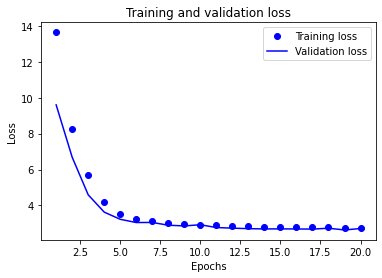

In [120]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') #'bo'는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') #'b'는 파란색 실선을 의미합니다.

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


훈련 검증 정확도 그리기

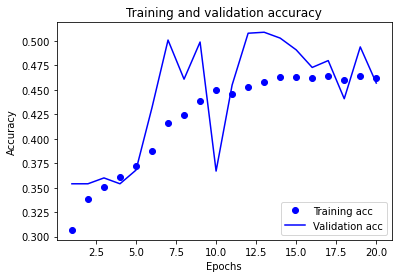

In [121]:
plt.clf() #그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

새로운 데이타로 예측하기

In [122]:
predictions =  model.predict(x_test)

In [123]:
predictions[0].shape

(46,)

In [124]:
np.sum(predictions[0])

0.9999997

In [125]:
np.argmax(predictions[0])

3